In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir("/Users/Muhammad_Numan/Desktop/")

In [84]:
#Reading Dataframe exported previously
combined_PRAD = pd.read_csv("PRAD_labeled.csv", index_col=0)

In [86]:
combined_PRAD

,A1BG,A1BG-AS1,A1CF,AACSP1,ABCA4,ABCC11,ABCC12,ABCC3,ABCC4,ABCC6P2,...,ZNF560,ZNF660,ZNF695,ZNF750,ZNF804A,ZNF90,ZP1,ZP2,ZSCAN4,labels
PRAD.T.72,7.209453,4.857981,3.000000,2.584963,3.906891,4.321928,0.000000,8.396605,14.400613,3.584963,...,2.584963,5.247928,2.000000,9.136991,5.285402,4.906891,6.643856,2.321928,1.000000,1
PRAD.T.216,4.700440,3.169925,1.000000,0.000000,2.584963,6.754888,1.584963,5.044394,13.980318,2.321928,...,0.000000,4.321928,3.584963,7.451211,2.807355,5.247928,5.857981,0.000000,0.000000,1
PRAD.T.76,5.727920,4.247928,2.321928,4.754888,4.754888,5.906891,0.000000,9.544964,14.613329,2.000000,...,3.000000,5.930737,3.807355,8.618386,5.044394,6.894818,3.906891,2.321928,2.000000,1
PRAD.T.38,5.087463,2.000000,2.584963,0.000000,4.700440,5.807355,1.000000,7.707359,14.963619,1.584963,...,2.000000,4.643856,3.459432,8.405141,5.247928,4.000000,6.392317,0.000000,0.000000,1
PRAD.T.386,6.209453,3.584963,2.000000,1.000000,3.700440,8.661778,3.000000,5.285402,14.690216,1.000000,...,2.000000,4.906891,4.169925,4.807355,3.459432,3.584963,8.179909,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRAD.N.32,9.887221,6.129283,2.584963,0.000000,8.149747,3.169925,1.000000,12.965604,9.668885,1.000000,...,1.000000,5.614710,1.000000,10.743151,4.906891,8.539159,2.807355,0.000000,5.459432,0
PRAD.N.24,9.063395,6.357552,2.321928,2.321928,4.247928,4.000000,0.000000,10.446049,14.076315,5.209453,...,2.584963,6.339850,3.459432,8.778077,6.781360,5.906891,6.108524,3.459432,3.906891,0
PRAD.N.41,8.957102,6.129283,1.584963,1.000000,3.906891,5.781360,0.000000,10.115044,14.105581,3.700440,...,3.584963,5.954196,1.584963,8.897845,7.417853,7.169925,3.584963,4.169925,3.584963,0
PRAD.N.49,6.714246,4.857981,0.000000,1.000000,6.129283,7.748193,1.584963,11.927037,12.580023,2.321928,...,2.321928,6.584963,2.321928,11.730895,5.357552,7.276124,3.000000,2.807355,7.011227,0


In [85]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'label'.
combined_PRAD['labels']= label_encoder.fit_transform(combined_PRAD['labels'])
#To have a list of unique enteries.
combined_PRAD['labels'].unique()

array([1, 0])

In [5]:
#counting the number of classes
combined_PRAD["labels"].value_counts()

1    502
0     52
Name: labels, dtype: int64

In [6]:
#Assigning the numerical data to a "X" variable and labels column into a "y" variable that will be used in the next steps
X = combined_PRAD.iloc[:,:-1]
y = combined_PRAD["labels"]

In [7]:
#importing train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train, Y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
#########Plotting TSNE plot to check whether problem is linear or not#######

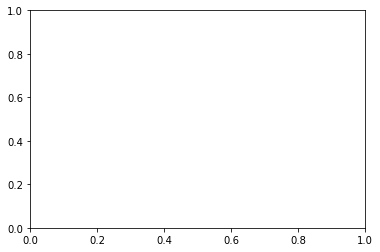

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
fig, ax = plt.subplots()
m = TSNE(learning_rate=50)
X_tsne = m.fit_transform(X)
combined_PRAD["y"] = Y_train
combined_PRAD["comp-1"] = X_tsne[:,0]
combined_PRAD["comp-2"] = X_tsne[:,1]

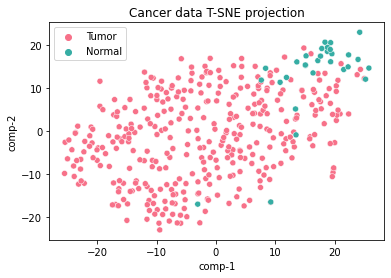

In [57]:
sns.scatterplot(x="comp-1", y="comp-2", hue=combined_PRAD.y.tolist(),
                palette=sns.color_palette('husl', 2),
                data=combined_PRAD).set(title="Cancer data T-SNE projection")
plt.savefig("TSNE-plot.png", dpi = 600)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
KNN = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)
KNN.fit(X_train,Y_train)
# predict samples in the test set
prediction = KNN.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9640718562874252


In [14]:
#Printing precision, recall and f1_scores
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

0.9664429530201343
0.993103448275862
0.9795918367346937


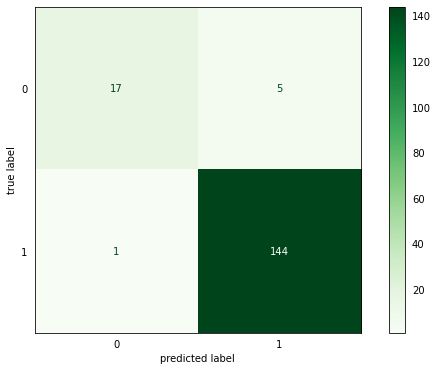

In [15]:
matrix= plot_confusion_matrix(KNN,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("KNN.png", dpi = 600)
plt.show()

In [16]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [17]:
KNN_probs = KNN.predict_proba(X_test)
KNN_probs = KNN_probs[:, 1]
KNN_auc = roc_auc_score(Y_test, KNN_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(Y_test, KNN_probs)

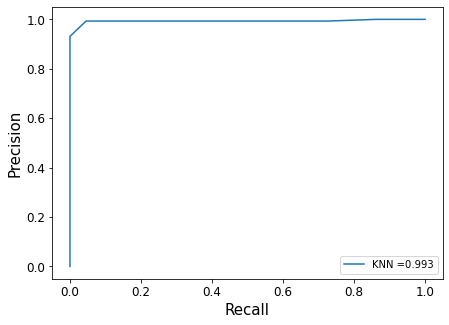

In [18]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(KNN_fpr, KNN_tpr ,label='KNN =%.3f' % (KNN_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('Precision', fontsize=15)
pyplot.xlabel('Recall', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("PR_curve.png", dpi = 600)
pyplot.show()

In [19]:
#SVC_linear
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', probability=True, random_state=40)
svm_linear.fit(X_train,Y_train).decision_function(X_test)
prediction = svm_linear.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9880239520958084


In [20]:
#Printing precision, recall and f1_scores
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

0.993103448275862
0.993103448275862
0.993103448275862


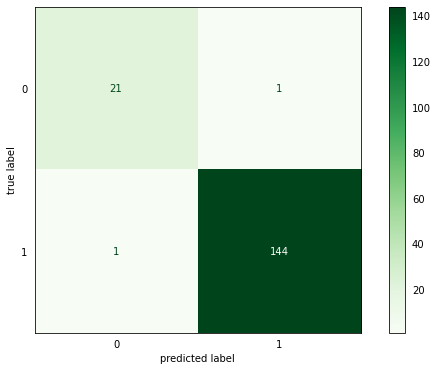

In [21]:
matrix= plot_confusion_matrix(svm_linear,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("svm_linear.png", dpi = 600)
plt.show()

In [22]:
svm_linear_probs = svm_linear.predict_proba(X_test)
svm_linear_probs = svm_linear_probs[:, 1]
svm_linear_auc = roc_auc_score(Y_test, svm_linear_probs)
svm_linear_fpr, svm_linear_tpr, _ = roc_curve(Y_test, svm_linear_probs)

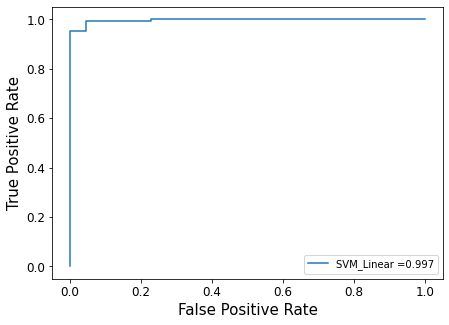

In [23]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(svm_linear_fpr, svm_linear_tpr ,label='SVM_Linear =%.3f' % (svm_linear_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [24]:
#SVC_poly
from sklearn.svm import SVC
# Training a SVM classifier using SVC class
svm_poly = SVC(kernel='poly', probability=True, random_state=40)
svm_poly.fit(X_train,Y_train).decision_function(X_test)
prediction = svm_poly.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9580838323353293


In [25]:
#Printing precision, recall and f1_scores
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

0.96
0.993103448275862
0.976271186440678


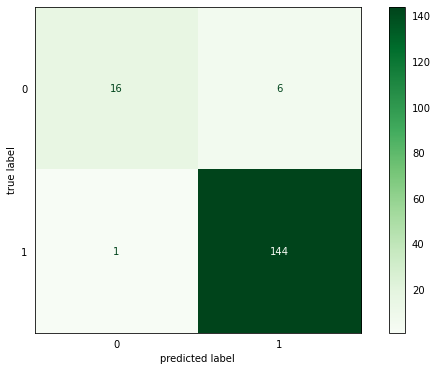

In [26]:
matrix= plot_confusion_matrix(svm_poly,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("svm_poly.png", dpi = 600)
plt.show()

In [27]:
svm_poly_probs = svm_poly.predict_proba(X_test)
svm_poly_probs = svm_poly_probs[:, 1]
svm_poly_auc = roc_auc_score(Y_test, svm_poly_probs)
svm_poly_fpr, svm_poly_tpr, _ = roc_curve(Y_test, svm_poly_probs)

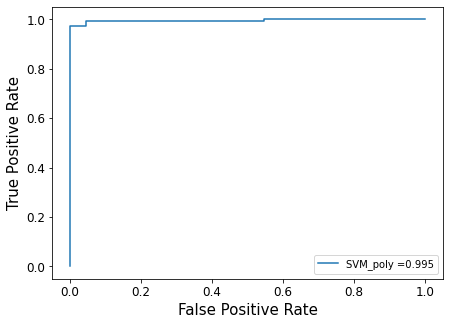

In [28]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(svm_poly_fpr, svm_poly_tpr ,label='SVM_poly =%.3f' % (svm_poly_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [29]:
#SVC_RBF 
from sklearn.svm import SVC
# Training a SVM classifier using SVC class
svm_rbf = SVC(kernel='rbf', probability=True, random_state=40)
svm_rbf.fit(X_train,Y_train).decision_function(X_test)
prediction = svm_rbf.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9461077844311377


In [30]:
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

0.9473684210526315
0.993103448275862
0.9696969696969696


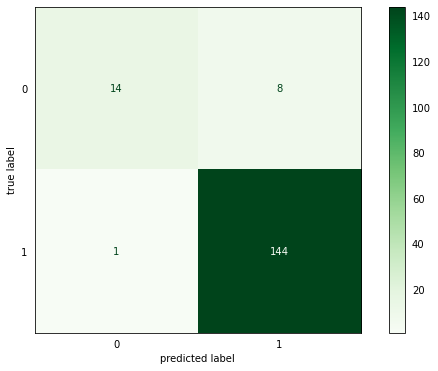

In [31]:
matrix= plot_confusion_matrix(svm_rbf,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("svm_rbf.png", dpi = 600)
plt.show()

In [32]:
svm_rbf_probs = svm_rbf.predict_proba(X_test)
svm_rbf_probs = svm_rbf_probs[:, 1]
svm_rbf_auc = roc_auc_score(Y_test, svm_rbf_probs)
svm_rbf_fpr, svm_rbf_tpr, _ = roc_curve(Y_test, svm_rbf_probs)

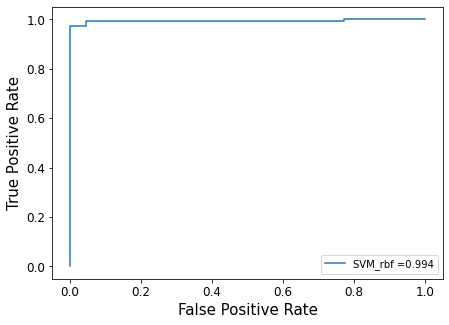

In [33]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(svm_rbf_fpr, svm_rbf_tpr ,label='SVM_rbf =%.3f' % (svm_rbf_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train).decision_function(X_test)
prediction = LR.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9880239520958084


C:\Users\Muhammad_Numan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

0.993103448275862
0.993103448275862
0.993103448275862


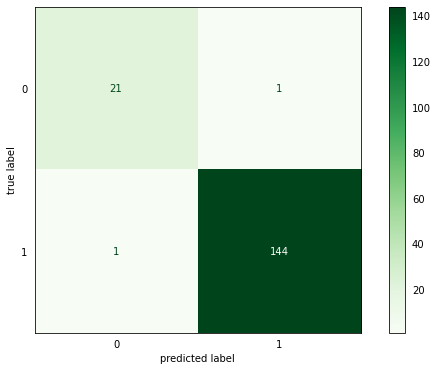

In [36]:
plot_confusion_matrix(LR,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("LR.png", dpi = 600)
plt.show()

In [37]:
LR_probs = LR.predict_proba(X_test)
LR_probs = LR_probs[:, 1]
LR_auc = roc_auc_score(Y_test, LR_probs)
LR_fpr, LR_tpr, _ = roc_curve(Y_test, LR_probs)

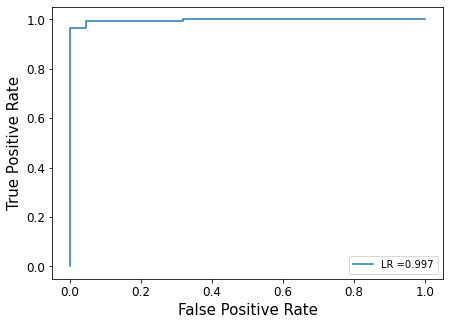

In [38]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(LR_fpr, LR_tpr ,label='LR =%.3f' % (LR_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [39]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train)
prediction = NB.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9401197604790419


In [40]:
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

1.0
0.9310344827586207
0.9642857142857143


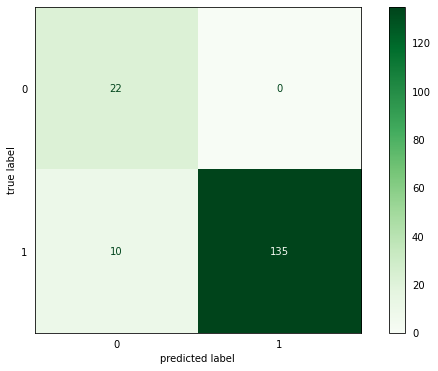

In [41]:
plot_confusion_matrix(NB,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("GNB.png", dpi = 600)
plt.show()

In [42]:
NB_probs = NB.predict_proba(X_test)
NB_probs = NB_probs[:, 1]
NB_auc = roc_auc_score(Y_test, NB_probs)
NB_fpr, NB_tpr, _ = roc_curve(Y_test, NB_probs)

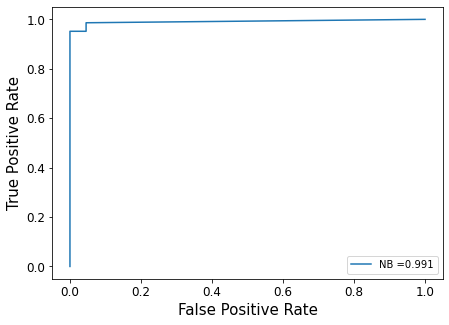

In [43]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(NB_fpr, NB_tpr ,label='NB =%.3f' % (NB_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [44]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier  
DT= DecisionTreeClassifier(random_state=0)
DT.fit(X_train, Y_train)
prediction = DT.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9880239520958084


In [45]:
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

0.993103448275862
0.993103448275862
0.993103448275862


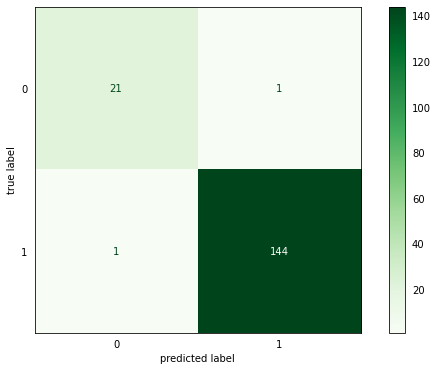

In [46]:
plot_confusion_matrix(DT,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("DT.png", dpi = 600)
plt.show()

In [47]:
DT_probs = DT.predict_proba(X_test)
DT_probs = DT_probs[:, 1]
DT_auc = roc_auc_score(Y_test, DT_probs)
DT_fpr, DT_tpr, _ = roc_curve(Y_test, DT_probs)

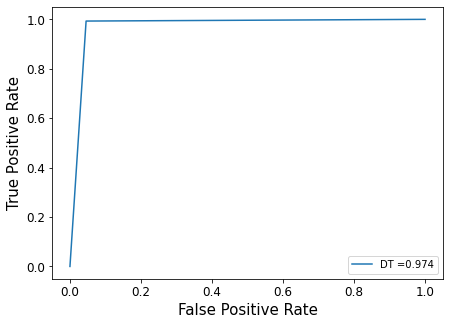

In [48]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(DT_fpr, DT_tpr ,label='DT =%.3f' % (DT_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [49]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, Y_train)
prediction = MLP.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9760479041916168


In [50]:
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

0.9862068965517241
0.9862068965517241
0.9862068965517241


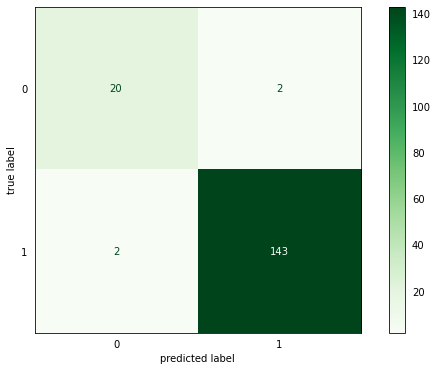

In [51]:
plot_confusion_matrix(MLP,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("MLP.png", dpi = 600)
plt.show()

In [72]:
MLP_probs = MLP.predict_proba(X_test)
MLP_probs = MLP_probs[:,1]
MLP_auc = roc_auc_score(Y_test, MLP_probs)
MLP_fpr, MLP_tpr, _ = roc_curve(Y_test, MLP_probs)

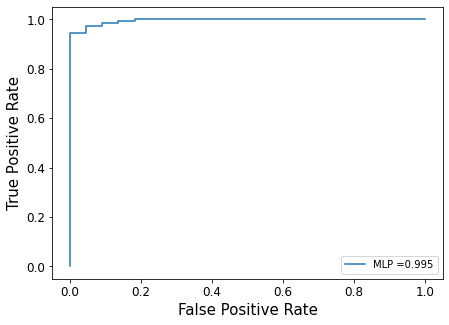

In [75]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(MLP_fpr, MLP_tpr ,label='MLP =%.3f' % (MLP_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [76]:
from sklearn.ensemble import AdaBoostClassifier
# define the model
AB = AdaBoostClassifier()
AB.fit(X_train, Y_train)
prediction = AB.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9760479041916168


In [77]:
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

0.993006993006993
0.9793103448275862
0.986111111111111


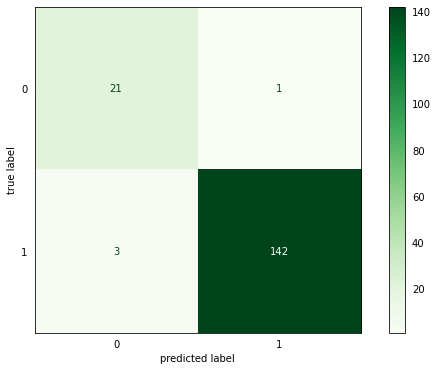

In [78]:
plot_confusion_matrix(AB,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("AB.png", dpi = 600)
plt.show()

In [79]:
AB_probs = AB.predict_proba(X_test)
AB_probs = AB_probs[:, 1]
AB_auc = roc_auc_score(Y_test, AB_probs)
AB_fpr, AB_tpr, _ = roc_curve(Y_test, AB_probs)

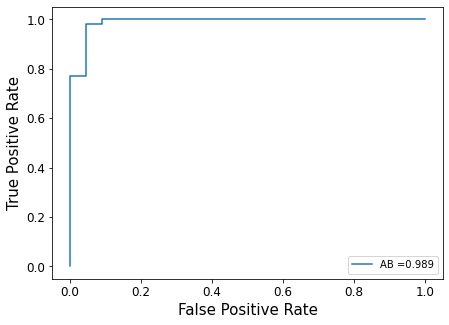

In [80]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(AB_fpr, AB_tpr ,label='AB =%.3f' % (AB_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier
# define the model
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
prediction = RF.predict(X_test)
Accuracy = accuracy_score(Y_test,prediction)
print('accuracy',Accuracy)

accuracy 0.9520958083832335


In [59]:
print(precision_score(Y_test,prediction))
print(recall_score(Y_test,prediction))
print(f1_score(Y_test,prediction))

0.9536423841059603
0.993103448275862
0.972972972972973


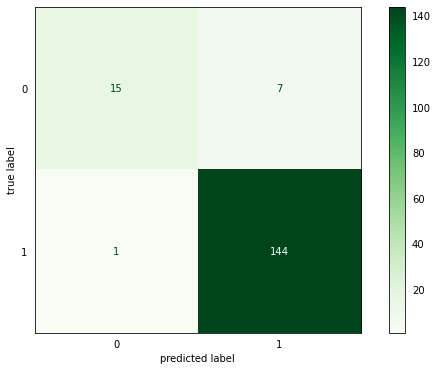

In [60]:
plot_confusion_matrix(RF,X_test,Y_test,cmap=plt.cm.Greens)
plt.xlabel('predicted label',color='black')
plt.ylabel('true label',color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.savefig("RF.png", dpi = 600)
plt.show()

In [81]:
RF_probs = RF.predict_proba(X_test)
RF_probs = RF_probs[:,1]
RF_auc = roc_auc_score(Y_test, RF_probs)
RF_fpr, RF_tpr, _ = roc_curve(Y_test, RF_probs)

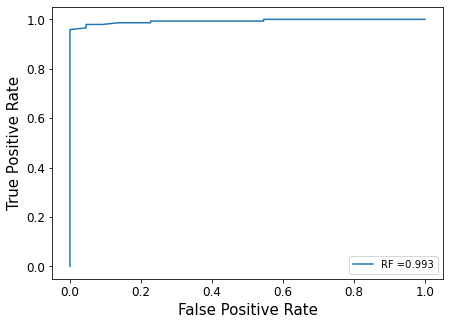

In [82]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(RF_fpr, RF_tpr ,label='RF =%.3f' % (RF_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
#plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [ ]:
#####Combined AUROC and PR Curves

In [63]:
KNN_probs = KNN.predict_proba(X_test)
AB_probs = AB.predict_proba(X_test)
DT_probs = DT.predict_proba(X_test)
LR_probs = LR.predict_proba(X_test)
RF_probs = RF.predict_proba(X_test)
NB_probs = NB.predict_proba(X_test)
MLP_probs = MLP.predict_proba(X_test)
svm_linear_probs =svm_linear.predict_proba(X_test)
svm_rbf_probs = svm_rbf.predict_proba(X_test)
svm_poly_probs = svm_poly.predict_proba(X_test)

In [64]:
# keep probabilities for the positive outcome only
KNN_probs = KNN_probs[:, 1]
AB_probs = AB_probs[:, 1]
DT_probs = DT_probs[:, 1]
LR_probs = LR_probs[:, 1]
RF_probs = RF_probs[:, 1]
NB_probs = NB_probs[:, 1]
MLP_probs = MLP_probs[:,1]
svm_linear_probs = svm_linear_probs[:, 1]
svm_poly_probs = svm_poly_probs[:, 1]
svm_rbf_probs = svm_rbf_probs[:, 1]

In [65]:
# calculate scores
KNN_auc = roc_auc_score(Y_test, KNN_probs)
AB_auc = roc_auc_score(Y_test, AB_probs)
DT_auc = roc_auc_score(Y_test, DT_probs)
LR_auc = roc_auc_score(Y_test, LR_probs)
NB_auc = roc_auc_score(Y_test, NB_probs)
RF_auc = roc_auc_score(Y_test, RF_probs)
MLP_auc = roc_auc_score(Y_test, MLP_probs)
svm_poly_auc = roc_auc_score(Y_test, svm_poly_probs)
svm_linear_auc = roc_auc_score(Y_test, svm_linear_probs)
svm_rbf_auc = roc_auc_score(Y_test, svm_rbf_probs)

In [66]:
# calculate roc curves
KNN_fpr, KNN_tpr, _ = roc_curve(Y_test, KNN_probs)
AB_fpr, AB_tpr, _ = roc_curve(Y_test, AB_probs)
DT_fpr, DT_tpr, _ = roc_curve(Y_test, DT_probs)
NB_fpr, NB_tpr, _ = roc_curve(Y_test, NB_probs)
LR_fpr, LR_tpr, _ = roc_curve(Y_test, LR_probs)
RF_fpr, RF_tpr, _ = roc_curve(Y_test, RF_probs)
MLP_fpr, MLP_tpr, _ = roc_curve(Y_test, MLP_probs)
svm_linear_fpr, svm_linear_tpr, _ = roc_curve(Y_test, svm_linear_probs)
svm_poly_fpr, svm_poly_tpr, _ = roc_curve(Y_test, svm_poly_probs)
svm_rbf_fpr, svm_rbf_tpr, _ = roc_curve(Y_test, svm_rbf_probs)

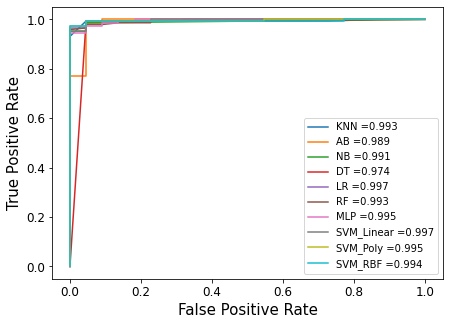

In [67]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(KNN_fpr, KNN_tpr ,label='KNN =%.3f' % (KNN_auc))
pyplot.plot(AB_fpr, AB_tpr ,label='AB =%.3f' % (AB_auc))
pyplot.plot(NB_fpr, NB_tpr ,label='NB =%.3f' % (NB_auc))
pyplot.plot(DT_fpr, DT_tpr ,label='DT =%.3f' % (DT_auc))
pyplot.plot(LR_fpr, LR_tpr ,label='LR =%.3f' % (LR_auc))
pyplot.plot(RF_fpr, RF_tpr ,label='RF =%.3f' % (RF_auc))
pyplot.plot(MLP_fpr, MLP_tpr ,label='MLP =%.3f' % (MLP_auc))
pyplot.plot(svm_linear_fpr, svm_linear_tpr ,label='SVM_Linear =%.3f' % (svm_linear_auc))
pyplot.plot(svm_poly_fpr, svm_poly_tpr ,label='SVM_Poly =%.3f' % (svm_poly_auc))
pyplot.plot(svm_rbf_fpr, svm_rbf_tpr ,label='SVM_RBF =%.3f' % (svm_rbf_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('True Positive Rate', fontsize=15)
pyplot.xlabel('False Positive Rate', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
plt.savefig("AUC_ROC.png", dpi = 600)
pyplot.show()

In [68]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve

In [69]:
KNN_precision, KNN_recall, _ = precision_recall_curve(Y_test, KNN_probs)
AB_precision, AB_recall, _ = precision_recall_curve(Y_test, AB_probs)
DT_precision, DT_recall, _ = precision_recall_curve(Y_test, DT_probs)
LR_precision, LR_recall, _ = precision_recall_curve(Y_test, LR_probs)
NB_precision, NB_recall, _ = precision_recall_curve(Y_test, NB_probs)
RF_precision, RF_recall, _ = precision_recall_curve(Y_test, RF_probs)
MLP_precision, MLP_recall, _ = precision_recall_curve(Y_test, MLP_probs)
svm_linear_precision, svm_linear_recall, _ = precision_recall_curve(Y_test, svm_linear_probs)
svm_poly_precision, svm_poly_recall, _ = precision_recall_curve(Y_test, svm_poly_probs)
svm_rbf_precision, svm_rbf_recall, _ = precision_recall_curve(Y_test, svm_rbf_probs)

In [70]:
from sklearn.metrics import auc
# calculate the precision-recall auc
KNN_auc = auc(KNN_recall, KNN_precision)
AB_auc = auc(AB_recall, AB_precision)
DT_auc = auc(DT_recall, DT_precision)
NB_auc = auc(NB_recall, NB_precision)
LR_auc = auc(LR_recall, LR_precision)
RF_auc = auc(RF_recall, RF_precision)
MLP_auc = auc(MLP_recall, MLP_precision)
svm_linear_auc = auc(svm_linear_recall, svm_linear_precision)
svm_poly_auc = auc(svm_poly_recall, svm_poly_precision)
svm_rbf_auc = auc(svm_rbf_recall, svm_rbf_precision)

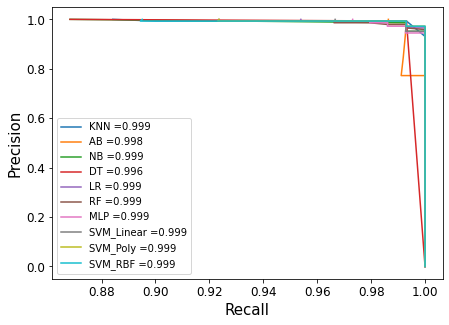

In [71]:
# plot the roc curve for the model
fig = pyplot.figure(figsize=(7, 5))
pyplot.plot(KNN_precision, KNN_recall ,label='KNN =%.3f' % (KNN_auc))
pyplot.plot(AB_precision, AB_recall ,label='AB =%.3f' % (AB_auc))
pyplot.plot(NB_precision, NB_recall ,label='NB =%.3f' % (NB_auc))
pyplot.plot(DT_precision, DT_recall ,label='DT =%.3f' % (DT_auc))
pyplot.plot(LR_precision, LR_recall ,label='LR =%.3f' % (LR_auc))
pyplot.plot(RF_precision, RF_recall ,label='RF =%.3f' % (RF_auc))
pyplot.plot(MLP_precision, MLP_recall ,label='MLP =%.3f' % (MLP_auc))
pyplot.plot(svm_linear_precision, svm_linear_recall ,label='SVM_Linear =%.3f' % (svm_linear_auc))
pyplot.plot(svm_poly_precision, svm_poly_recall ,label='SVM_Poly =%.3f' % (svm_poly_auc))
pyplot.plot(svm_rbf_precision, svm_rbf_recall ,label='SVM_RBF =%.3f' % (svm_rbf_auc))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)
pyplot.legend()
pyplot.ylabel('Precision', fontsize=15)
pyplot.xlabel('Recall', fontsize=15)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#Show legend
pyplot.legend() # 
plt.savefig("PR_curve.png", dpi = 600)
pyplot.show()